# Import library

In [125]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [126]:
from skimage import io

In [127]:
from PIL import Image
# from tensorflow.keras.utils import load_img
import keras.utils as image ##!!!

In [128]:
import splitfolders

In [129]:
import tensorflow as tf

In [130]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [131]:
import cv2

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

--------
# Image Directory

In [9]:
# Download from kaggle
down_angry = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_16000\kaggle\angry"
down_happy = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_16000\kaggle\happy"
down_relaxed = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_16000\kaggle\relaxed"
down_sad = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_16000\kaggle\sad"

In [10]:
# After filtering images from 16000 to 600
raw_angry = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\angry"
raw_happy = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\happy"
raw_relaxed = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\relaxed"
raw_sad = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\sad"


In [11]:
# After augmenting the images from 600 to 3000
aug_angry = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600_1\image_aug\angry"
aug_happy = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600_1\image_aug\happy"
aug_relaxed = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600_1\image_aug\relaxed"
aug_sad = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600_1\image_aug\sad"


In [12]:
input_folder = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_aug"
output_folder= r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_tra_tes_val"
train_folder = r"C:/Users/user/Documents/JupyterWork/CMSE890_AML/datasets/dog_images_600/image_tra_tes_val/train/"
validation_folder = "C:/Users/user/Documents/JupyterWork/CMSE890_AML/datasets/dog_images_600/image_tra_tes_val/val/"
test_folder = r"C:/Users/user/Documents/JupyterWork/CMSE890_AML/datasets/dog_images_600/image_tra_tes_val/test/"

-----
#### DO NOT RUN THIS CODE!
# Image Augmentation

In [17]:
# Construct an instance of the ImageDataGenerator class
# Pass the augmentation parameters through the constructor. 

datagen = ImageDataGenerator(
        rotation_range=15,     #Random rotation between 0 and 45
        width_shift_range=0.1,   #% shift
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')    #Also try nearest, constant, reflect, wrap



----
#### DO NOT RUN THIS CODE!
#### Angry

In [18]:
# Angry
image_directory = raw_angry
SIZE = 224
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory  +'\\'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

In [19]:
i = 0
for batch in datagen.flow(x, batch_size=150,  
                          save_to_dir=aug_angry, 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely  

----
#### DO NOT RUN THIS CODE!
#### happy

In [20]:
# happy

image_directory = raw_happy
SIZE = 224
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory  +'\\'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

In [21]:
i = 0
for batch in datagen.flow(x, batch_size=150,  
                          save_to_dir=aug_happy, 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely  

----
#### DO NOT RUN THIS CODE!
#### relaxed

In [22]:
# relaxed

image_directory = raw_relaxed
SIZE = 224
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory  +'\\'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

In [23]:
i = 0
for batch in datagen.flow(x, batch_size=150,  
                          save_to_dir=aug_relaxed, 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely  

----
#### DO NOT RUN THIS CODE!
#### sad

In [24]:
# sad

image_directory = raw_sad
SIZE = 224
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory  +'\\'+ image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)

In [25]:
i = 0
for batch in datagen.flow(x, batch_size=150,  
                          save_to_dir=aug_sad, 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i > 4:
        break  # otherwise the generator would loop indefinitely  

---------
#### RUN THE CODE FROM HERE
# 4.1.1. Original Data

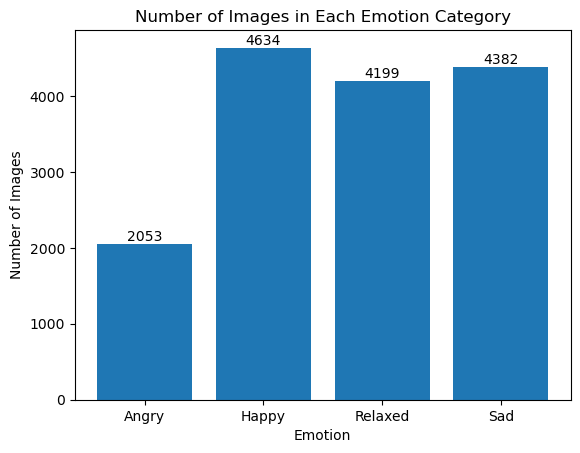

In [144]:
# Count the number of images in each folder
angry_count = len(os.listdir(down_angry))
happy_count = len(os.listdir(down_happy))
relaxed_count = len(os.listdir(down_relaxed))
sad_count = len(os.listdir(down_sad))

# Create a list of the image counts and a list of the folder names
counts = [angry_count, happy_count, relaxed_count, sad_count]
folders = ['Angry', 'Happy', 'Relaxed', 'Sad']

# Create a bar chart
plt.bar(folders, counts)

# Add labels to the x and y axes and a title
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Emotion Category')

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

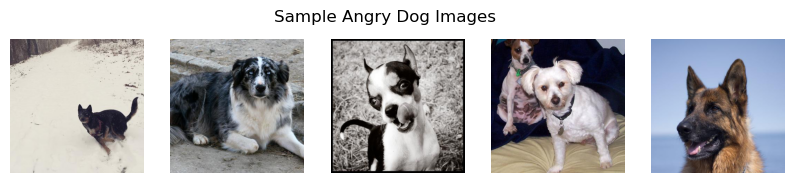

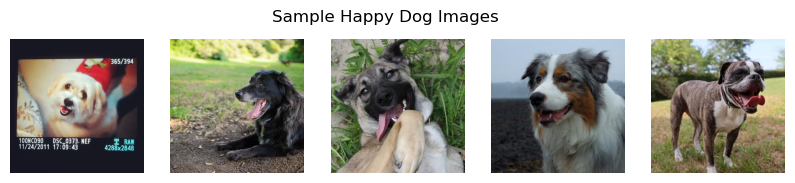

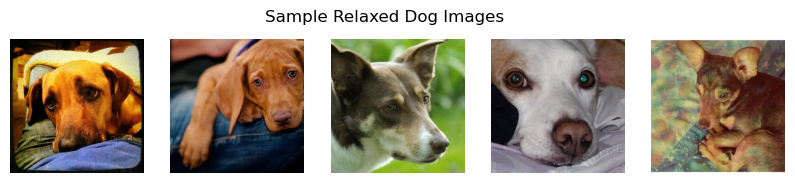

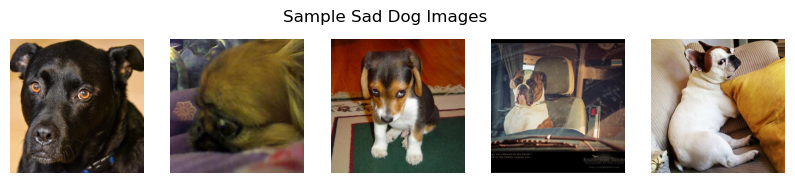

In [143]:
def plot_images(folder_path, title):
  # Get the path to 5 random images
  image_paths = random.sample(os.listdir(folder_path), 5)
  # Load the images
  images = (plt.imread(os.path.join(folder_path, path)) for path in image_paths)
  # Plot the images
  fig, axs = plt.subplots(1, 5, figsize=(10, 2))
  for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].axis("off")
  plt.suptitle(title)
  plt.show()

plot_images(down_angry, "Sample Angry Dog Images")
plot_images(down_happy, "Sample Happy Dog Images")
plot_images(down_relaxed, "Sample Relaxed Dog Images")
plot_images(down_sad, "Sample Sad Dog Images")

------

# 4.1.2. Cleaned Data

In [112]:
# set the path to your image file
image_path = r"C:\Users\user\Documents\JupyterWork\CMSE890_AML\datasets\dog_images_600\image_raw\happy\178269085_282c3004f4_b.jpg"

# open the image using PIL's Image module
image = Image.open(image_path)

# check the size and format of the image
print("Image size: ", image.size)
print("Image format: ", image.format)

# check the RGB bands of the image
bands = image.getbands()
if bands == ('R', 'G', 'B'):
    print("Image is RGB")
else:
    print("Image is not RGB")


Image size:  (384, 384)
Image format:  JPEG
Image is RGB


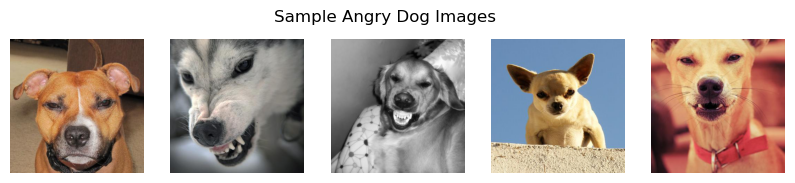

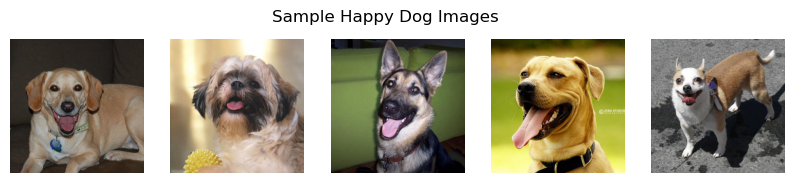

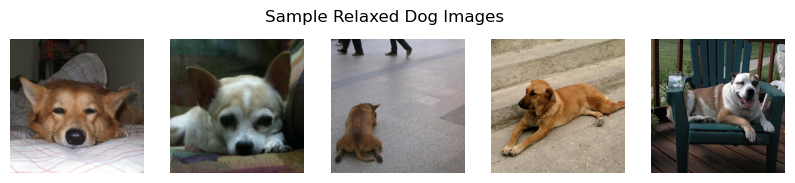

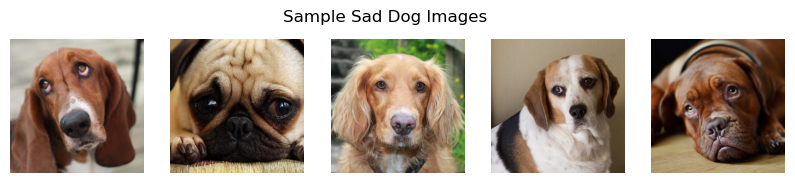

In [113]:
def plot_images(folder_path, title):
  # Get the path to 5 random images
  image_paths = random.sample(os.listdir(folder_path), 5)
  # Load the images
  images = (plt.imread(os.path.join(folder_path, path)) for path in image_paths)
  # Plot the images
  fig, axs = plt.subplots(1, 5, figsize=(10, 2))
  for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].axis("off")
  plt.suptitle(title)
  plt.show()

plot_images(raw_angry, "Sample Angry Dog Images")
plot_images(raw_happy, "Sample Happy Dog Images")
plot_images(raw_relaxed, "Sample Relaxed Dog Images")
plot_images(raw_sad, "Sample Sad Dog Images")

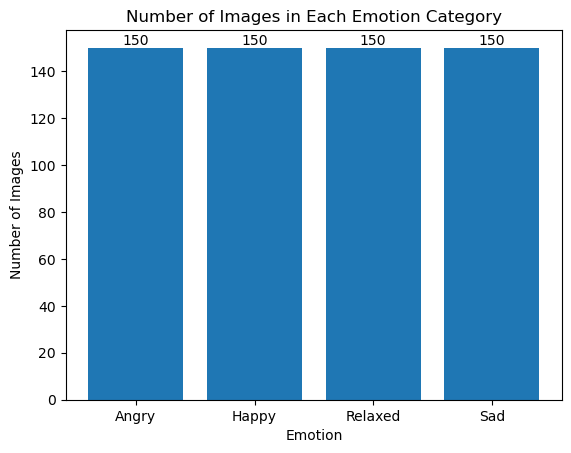

In [114]:
# Count the number of images in each folder
angry_count = len(os.listdir(raw_angry))
happy_count = len(os.listdir(raw_happy))
relaxed_count = len(os.listdir(raw_relaxed))
sad_count = len(os.listdir(raw_sad))

# Create a list of the image counts and a list of the folder names
counts = [angry_count, happy_count, relaxed_count, sad_count]
folders = ['Angry', 'Happy', 'Relaxed', 'Sad']

# Create a bar chart
plt.bar(folders, counts)

# Add labels to the x and y axes and a title
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Emotion Category')

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

------
# 4.2.1 Data Augmentation

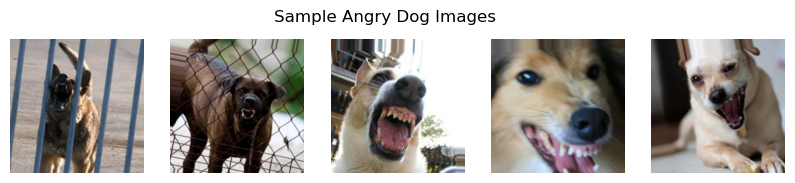

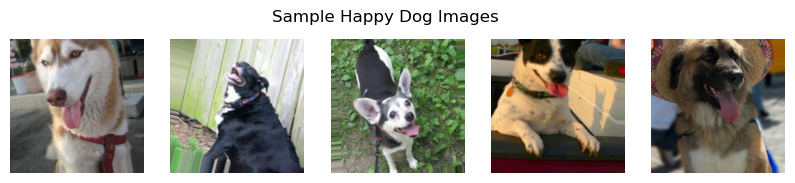

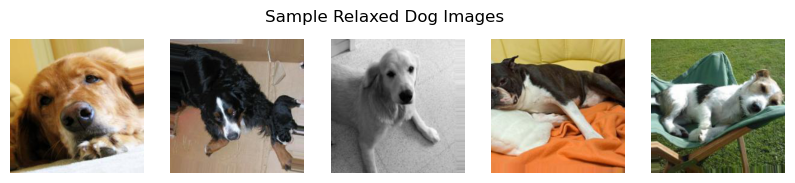

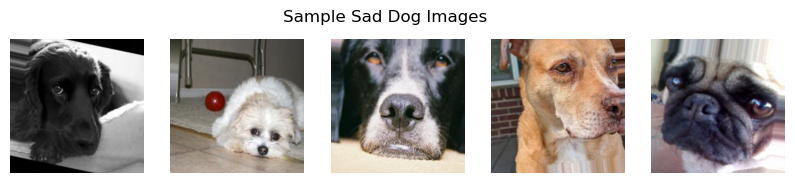

In [115]:
def plot_images(folder_path, title):
  # Get the path to 5 random images
  image_paths = random.sample(os.listdir(folder_path), 5)
  # Load the images
  images = (plt.imread(os.path.join(folder_path, path)) for path in image_paths)
  # Plot the images
  fig, axs = plt.subplots(1, 5, figsize=(10, 2))
  for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].axis("off")
  plt.suptitle(title)
  plt.show()

plot_images(aug_angry, "Sample Angry Dog Images")
plot_images(aug_happy, "Sample Happy Dog Images")
plot_images(aug_relaxed, "Sample Relaxed Dog Images")
plot_images(aug_sad, "Sample Sad Dog Images")

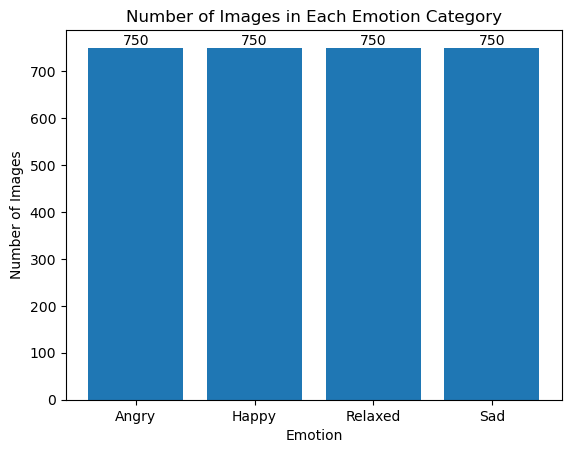

In [116]:
# Count the number of images in each folder
angry_count = len(os.listdir(aug_angry))
happy_count = len(os.listdir(aug_happy))
relaxed_count = len(os.listdir(aug_relaxed))
sad_count = len(os.listdir(aug_sad))

# Create a list of the image counts and a list of the folder names
counts = [angry_count, happy_count, relaxed_count, sad_count]
folders = ['Angry', 'Happy', 'Relaxed', 'Sad']

# Create a bar chart
plt.bar(folders, counts)

# Add labels to the x and y axes and a title
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Emotion Category')

# Annotate each bar with its count
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# 4.2.3. Principal Components Analysis

In [40]:
# Create a list of image directories
img_dirs = [aug_angry, aug_happy, aug_relaxed, aug_sad]

# Define the target labels
target_labels = ['0', '1', '2', '3'] # 'angry', 'happy', 'relaxed', 'sad'

pca_n = 16

# Load the images and apply PCA
X = []
y = []

for i, img_dir in enumerate(img_dirs):
    for filename in os.listdir(img_dir):
        img_path = os.path.join(img_dir, filename)
        img = Image.open(img_path)
        img_arr = np.array(img)
        X.append(img_arr.flatten())
        y.append(target_labels[i])

In [41]:
X = np.array(X)
pca = PCA(n_components=pca_n**2)
X_pca = pca.fit_transform(X)

In [42]:
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance: {explained_variance}")

Explained variance: 0.9065812382295055


In [16]:
# Do not run this code
pca_ns = [100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]
explained_variances = []
for pca_n in pca_ns:
    X = []
    y = []
    for i, img_dir in enumerate(img_dirs):
        for filename in os.listdir(img_dir):
            img_path = os.path.join(img_dir, filename)
            img = Image.open(img_path)
            img_arr = np.array(img)
            X.append(img_arr.flatten())
            y.append(target_labels[i])
    X = np.array(X)
    pca = PCA(n_components=pca_n)
    X_pca = pca.fit_transform(X)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

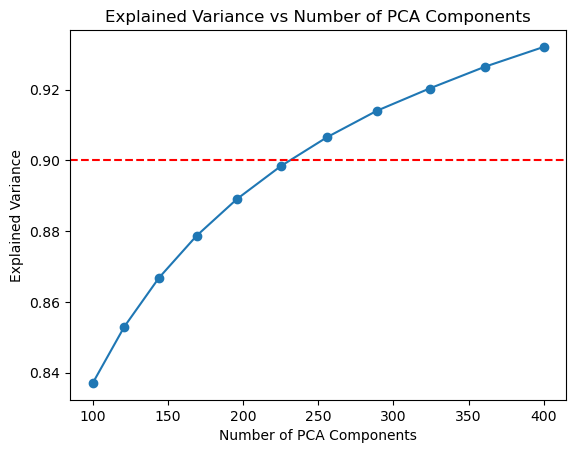

In [17]:
import matplotlib.pyplot as plt

plt.plot(pca_ns, explained_variances, '-o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs Number of PCA Components')
plt.show()


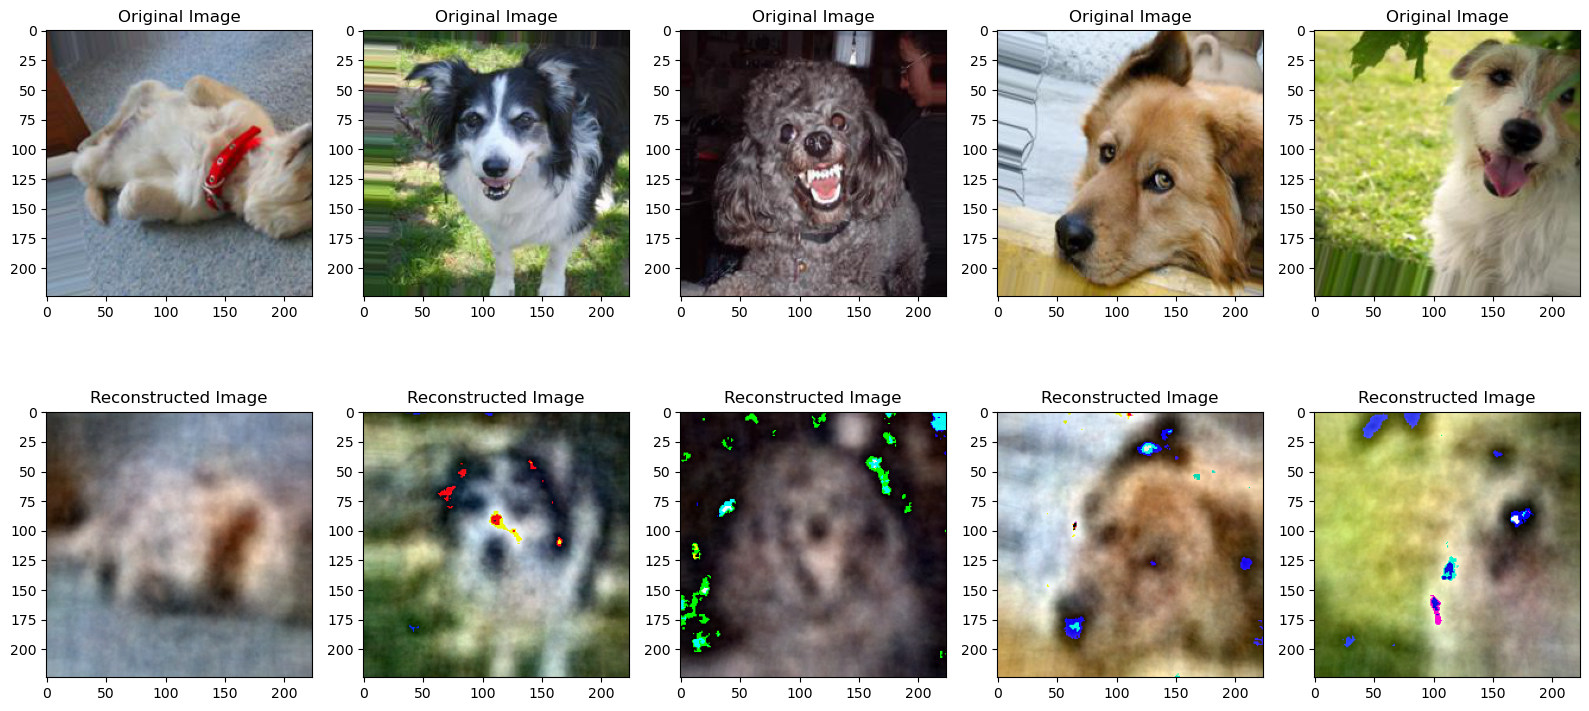

In [43]:
import random

# show 5 random sample images and reconstructed images
fig, axs = plt.subplots(2, 5, figsize=(16, 8))

for i in range(5):
    # randomly select an image
    idx = random.randint(0, len(X)-1)
    
    # show original image
    original_image = X[idx].reshape(224, 224, 3)
    axs[0, i].imshow(original_image)
    axs[0, i].set_title('Original Image')
    
    # show reconstructed image
    reconstructed_images = pca.inverse_transform(X_pca[idx])
    reconstructed_images = reconstructed_images.reshape(224, 224, 3)
    reconstructed_image = Image.fromarray(reconstructed_images.astype('uint8'))
    axs[1, i].imshow(reconstructed_image)
    axs[1, i].set_title('Reconstructed Image')

plt.tight_layout()
plt.show()
